In [1]:
# pacotes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import powerlaw             # mais informações em: https://pypi.org/project/powerlaw/

In [2]:
# dataset

ano = 2025
FILE = f"city_size_{ano}.csv" # arquivo .csv com os dados do IBGE (já foram tratados no Excel)
df = pd.read_csv(FILE)      # leitura do dataset com a biblioteca Pandas
s = df["SIZE"]              # coluna das populações de cada um dos municípios (já está em ordem decrescente)

In [3]:
# ajuste (fitting)

fit     = powerlaw.Fit(s, discrete = True)                  # fitting para dataset s

# observações:
# o x_min ótimo é calculado automaticamente pelo método, visando minimizar a distância D de Kolmogorov-Smirnov (KS)

Calculating best minimal value for power law fit
C:\Users\caiqu\anaconda3\envs\rpy\Lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
C:\Users\caiqu\anaconda3\envs\rpy\Lib\site-packages\powerlaw.py:699: RuntimeWarning: divide by zero encountered in divide
  (CDF_diff**2) /


In [4]:
# estimativa dos parâmetros

# cauda
print("parâmetros da cauda:")
x_min   = int(fit.power_law.xmin)              # valor mínimo da cauda
n_tail  = int(fit.n_tail)                      # tamanho da cauda
print(f"x_min  = {x_min}")
print(f"n_tail = {n_tail}\n")

# power law
print("lei de potência:")
alpha = fit.power_law.alpha
D_ks  = fit.power_law.D
print(f"alpha = {alpha:.4f}")
print(f"D_ks  = {D_ks:.4f}\n")

# pareto
print("distribuição de Pareto:") # diferença de convenção
alpha_pareto = alpha - 1                      
D_ks_p  = fit.power_law.D
print(f"alpha (Pareto) = {alpha_pareto:.4f}")
print(f"D_ks  = {D_ks:.4f}\n")

# lognormal
print("distribuição log-normal:")
mu    = fit.lognormal.mu
sigma = fit.lognormal.sigma
D_ks_l  = fit.lognormal.D
print(f"mu    = {mu:.4f}")
print(f"sigma = {sigma:.4f}")
print(f"D_ks  = {D_ks_l:.4f}\n")
      
# truncated power law
print("lei de potência truncada:")
alpha_t  = fit.truncated_power_law.alpha
Lambda = fit.truncated_power_law.Lambda
D_ks_t   = fit.truncated_power_law.D
print(f"alpha  = {alpha_t:.4f}")
print(f"Lambda = {Lambda:.2e}")
print(f"D_ks   = {D_ks_t:.4f}")

# observações:
# os parâmetros são calculados através de maximum likelihood estimator (MLE)
# o p-value relativo à D pode ser estimado por bootstrapping caso seja necessário, porém é computacionalmente trabalhoso
# geralmente basta comparar o desempenho das distribuições candidatas a partir de loglikelikehood ratio tests
# conforme sugerem os autores do pacote powerlaw em seu artigo

parâmetros da cauda:
x_min  = 23293
n_tail = 1539

lei de potência:
alpha = 2.0773
D_ks  = 0.0200

distribuição de Pareto:
alpha (Pareto) = 1.0773
D_ks  = 0.0200

distribuição log-normal:
mu    = -2.9216
sigma = 3.6993
D_ks  = 0.0179

lei de potência truncada:
alpha  = 2.0277
Lambda = 1.53e-07
D_ks   = 0.0149


In [5]:
# loglikelihood ratio tests

# comparação de Pareto com lognormal:
print("Pareto vs lognormal:")
R, p = fit.distribution_compare('power_law', 'lognormal')
print(f"R = {R:.2f}, p = {p:.2f}\n")

# comparação de Pareto com lei de potência truncada:
print("Pareto vs lei de potência truncada:")
R, p = fit.distribution_compare('power_law', 'truncated_power_law')
print(f"R = {R:.2f}, p = {p:.2f}\n")

# comparação de lognormal com Pareto truncado:
print("lognormal vs lei de potência truncada:")
R, p = fit.distribution_compare('lognormal', 'truncated_power_law')
print(f"R = {R:.2f}, p = {p:.2f}\n")

# interpretação:
# p > 0.05: o valor de R não é significativo
# R > 0 e p < 0.05: a primeira distribuição se ajusta melhor
# R < 0 e p < 0.05: a segunda distribuição se ajusta melhor

Pareto vs lognormal:
R = -2.21, p = 0.22

Pareto vs lei de potência truncada:


Assuming nested distributions


R = -2.86, p = 0.02

lognormal vs lei de potência truncada:
R = -0.65, p = 0.60



C:\Users\caiqu\AppData\Local\Temp\ipykernel_17952\4182185427.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


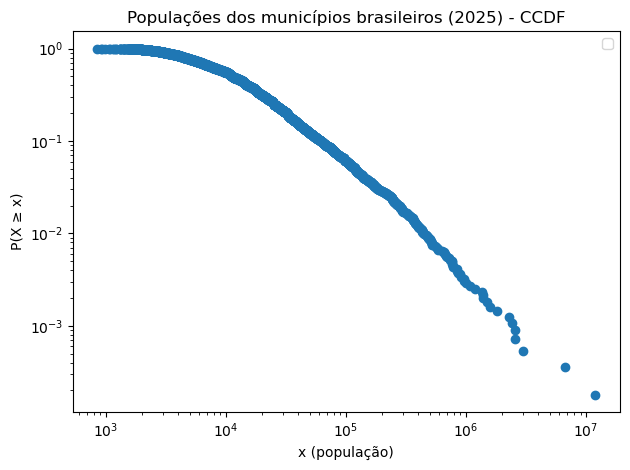

In [6]:
# gráfico da Complementary Cumulative Distribution Function (CCDF) em escala log-log

fig = powerlaw.plot_ccdf(s, marker='o', linewidth=0)
plt.legend()
plt.xlabel("x (população)")
plt.ylabel("P(X ≥ x)")
plt.title(f"Populações dos municípios brasileiros ({ano}) - CCDF")
plt.tight_layout()

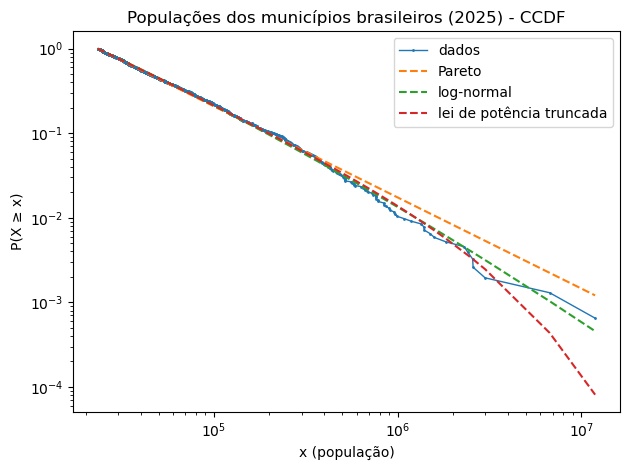

In [7]:
# ajuste dos modelos com o gráfico da CCDF

fig = fit.plot_ccdf(marker='o', markersize=1, linewidth=1, label='dados')
fit.power_law.plot_ccdf(ax=fig, linestyle='--', label='Pareto')
fit.lognormal.plot_ccdf(ax=fig, linestyle='--', label='log-normal')
fit.truncated_power_law.plot_ccdf(ax=fig, linestyle='--', label='lei de potência truncada')
plt.legend()
plt.xlabel("x (população)")
plt.ylabel("P(X ≥ x)")
plt.title(f"Populações dos municípios brasileiros ({ano}) - CCDF")
plt.tight_layout()

C:\Users\caiqu\AppData\Local\Temp\ipykernel_17952\1168560438.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


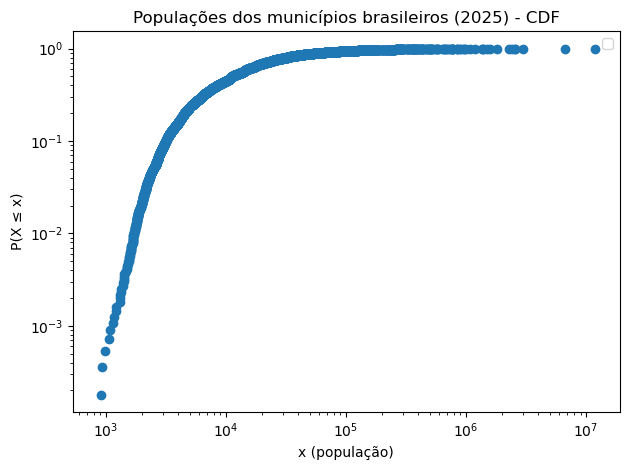

In [8]:
# gráfico da Cumulative Distribution Function (CDF) em escala log-log

fig = powerlaw.plot_cdf(s, marker='o', linewidth=0)
plt.legend()
plt.xlabel("x (população)")
plt.ylabel("P(X ≤ x)")
plt.title(f"Populações dos municípios brasileiros ({ano}) - CDF")
plt.tight_layout()

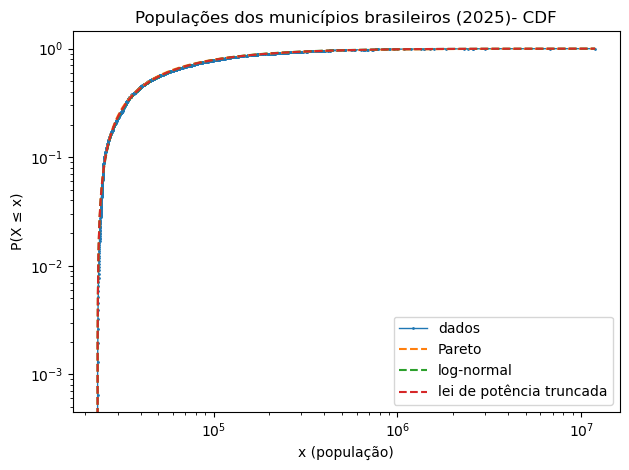

In [9]:
# ajuste dos modelos com o gráfico da CDF

fig = fit.plot_cdf(marker='o', markersize=1, linewidth=1, label='dados')
fit.power_law.plot_cdf(ax=fig, linestyle='--', label='Pareto')
fit.lognormal.plot_cdf(ax=fig, linestyle='--', label='log-normal')
fit.truncated_power_law.plot_cdf(ax=fig, linestyle='--', label='lei de potência truncada')
plt.legend()
plt.xlabel("x (população)")
plt.ylabel("P(X ≤ x)")
plt.title(f"Populações dos municípios brasileiros ({ano})- CDF")
plt.tight_layout()

C:\Users\caiqu\AppData\Local\Temp\ipykernel_17952\365549896.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


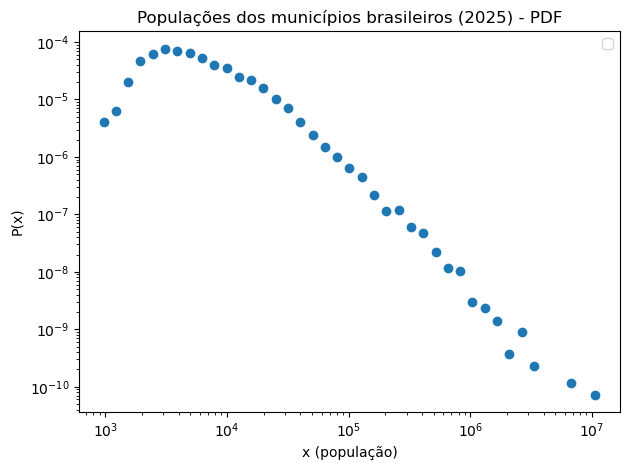

In [10]:
# gráfico da Probability Distribution Function (PDF) em escala log-log

fig = powerlaw.plot_pdf(s, marker='o', linewidth=0)
plt.legend()
plt.xlabel("x (população)")
plt.ylabel("P(x)")
plt.title(f"Populações dos municípios brasileiros ({ano}) - PDF")
plt.tight_layout()

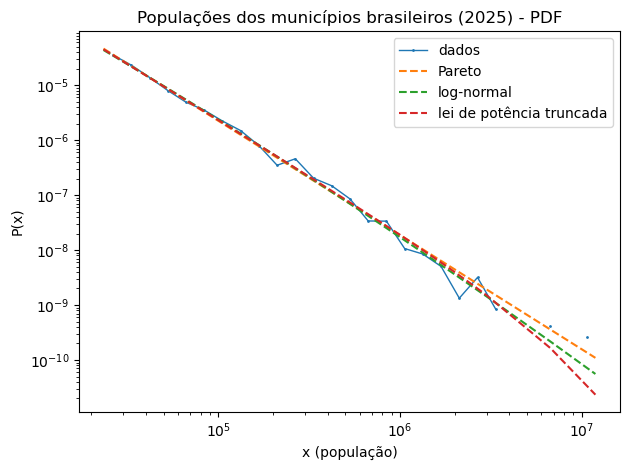

In [11]:
# ajuste dos modelos com o gráfico da PDF

fig = fit.plot_pdf(marker='o', markersize=1, linewidth=1, label='dados')
fit.power_law.plot_pdf(ax=fig, linestyle='--', label='Pareto')
fit.lognormal.plot_pdf(ax=fig, linestyle='--', label='log-normal')
fit.truncated_power_law.plot_pdf(ax=fig, linestyle='--', label='lei de potência truncada')
plt.legend()
plt.xlabel("x (população)")
plt.ylabel("P(x)")
plt.title(f"Populações dos municípios brasileiros ({ano}) - PDF")
plt.tight_layout()

In [12]:
# funções

# função que calcula as estatísticas descritivas básicas
def stats(s): 
    stats = pd.Series({
        "Quantidade"                       : s.size,
        "Total"                            : s.sum(),
        "Mínimo"                           : s.min(),
        "máximo"                           : s.max(),
        "Amplitude"                        : s.max() - s.min(),
        "Média aritmética"                 : s.mean(),
        "Mediana"                          : s.median(),
        "Percentil 25 (P25)"               : s.quantile(0.25),
        "Percentil (P75)"                  : s.quantile(0.75),
        "Intervalo Interquantil (IQR)"     : s.quantile(0.75) - s.quantile(0.25),
        "Variância"                        : s.var(ddof=0),
        "Desvio padrão"                    : s.std(ddof=0),
        "Coeficiente de variação - CV (%)" : (s.std(ddof=0) / s.mean() * 100) if s.mean() != 0 else np.nan,
        "Assimetria (skewness)"            : s.skew(),
        "Curtose (kurtosis) (Fisher)"      : s.kurt(),
    }, name=getattr(s, "name", "column"))
    return stats.to_frame("value").astype(float)

# função que calcula a tabela de concentração dos dados empíricos por percentil superior:
def top_shares(s):
    rows = []
    for p in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
        k = max(1, int(np.ceil(p/100 * s.size)))
        share = (s.iloc[:k].sum() / s.sum() * 100)
        rows.append((p, share))
    return pd.DataFrame(rows, columns=["Percentil superior (%)", "Participação no total (%)"])

# função que calcula a tabela de concentração por percentil superior teoricamente por Pareto, utilizando o valor estimado de alpha:
def pareto_top_shares(alpha):
    p = np.arange(10, 101, 10, dtype=float)
    shares = (p/100.0) ** (1.0 - 1.0/alpha) * 100.0
    return pd.DataFrame({
        "Percentil superior (%)": p.astype(int),
        "Participação no total (%)": shares
    })


# função que retorna o número esperado de observações na faixa definida:
def expected_counts_by_interval(s, fit, x_min, n_tail, faixas):
    rows = []
    for a, b in faixas:
        if np.isinf(b):
            label = f"[{a:,.0f}, +∞)"
        else:
            label = f"[{a:,.0f}, {b:,.0f})"
        real = ((s >= a) & (s < b)).sum()
        if b <= x_min:
            exp_pl = exp_logn = exp_tpl = 0.0
        else:
            a_eff = max(a, x_min)
            if np.isinf(b):
                p_pl   = 1.0 - fit.power_law.cdf(a_eff).item()
                p_logn = 1.0 - fit.lognormal.cdf(a_eff).item()
                p_tpl  = 1.0 - fit.truncated_power_law.cdf(a_eff).item()
            else:
                p_pl   = (fit.power_law.cdf(b) - fit.power_law.cdf(a_eff)).item()
                p_logn = (fit.lognormal.cdf(b) - fit.lognormal.cdf(a_eff)).item()
                p_tpl  = (fit.truncated_power_law.cdf(b) - fit.truncated_power_law.cdf(a_eff)).item()
            exp_pl   = n_tail * p_pl
            exp_logn = n_tail * p_logn
            exp_tpl  = n_tail * p_tpl
        rows.append([
            label,
            real,
            exp_pl,
            exp_logn,
            exp_tpl
        ])
    tabela = pd.DataFrame(
        rows,
        columns=[
            "Faixa de população",
            "Dados reais (contagem)",
            "Pareto (qtd esperada)",
            "Lognormal (qtd esperada)",
            "Lei de potência truncada (qtd esperada)"
        ]
    )
    return tabela

In [13]:
# tabelas

# cauda
tail = df[s >= x_min]
t = tail["SIZE"]
t = t.sort_values(ascending=False)

# estatísticas descritivas básicas
print(f"Estatísticas descritivas básicas (dataset inteiro) - Populações dos municípios brasileiros ({ano})")
display(stats(s).style.format("{:,.2f}"))
print(f"Estatísticas descritivas básicas (cauda) - Populações dos municípios brasileiros com mais de {x_min} habitantes ({ano})")
display(stats(t).style.format("{:,.2f}"))

# concentração dos dados
# exemplo: 20% dos municípios tem x % da população total do país
print(f"Concentração dos dados empíricos (dataset inteiro)")
display(top_shares(s).style.format({"Percentil superior (%)": "{:.0f}", "Participação no total (%)": "{:,.2f}"}))
print(f"Concentração dos dados empíricos (cauda) - Populações dos municípios brasileiros com mais de {x_min} habitantes ({ano})")
display(top_shares(t).style.format({"Percentil superior (%)": "{:.0f}", "Participação no total (%)": "{:,.2f}"}))
print(f"Concentração teórica de Pareto com o alpha estimado (cauda) - Populações dos municípios brasileiros com mais de {x_min} habitantes ({ano})")
display(pareto_top_shares(alpha_pareto).style.format({"Percentil superior (%)": "{:.0f}", "Participação no total (%)": "{:,.2f}"}))

# quantidade de municípios por faixa de população
print(f"Quantidade de municípios por faixa de população")
faixas = [
    (25_000, 50_000),
    (50_000, 100_000),
    (100_000, 200_000),
    (200_000, 500_000),
    (500_000, 1_000_000),
    (1_000_000, 5_000_000),
    (5_000_000, np.inf),
]
display(expected_counts_by_interval(s, fit, x_min, n_tail, faixas).style.format({
        "Dados reais (contagem)": "{:.0f}".format,
        "Pareto (qtd esperada)": "{:.0f}".format,
        "Lognormal (qtd esperada)": "{:.0f}".format,
        "Lei de potência truncada (qtd esperada)": "{:.0f}".format,
    })
)

Estatísticas descritivas básicas (dataset inteiro) - Populações dos municípios brasileiros (2025)


,value
Quantidade,"5,571.00"
Total,"213,421,037.00"
Mínimo,856.00
máximo,"11,904,961.00"
Amplitude,"11,904,105.00"
Média aritmética,"38,309.29"
Mediana,"11,355.00"
Percentil 25 (P25),"5,348.50"
Percentil (P75),"25,299.00"
Intervalo Interquantil (IQR),"19,950.50"


Estatísticas descritivas básicas (cauda) - Populações dos municípios brasileiros com mais de 23293 habitantes (2025)


,value
Quantidade,"1,539.00"
Total,"176,839,695.00"
Mínimo,"23,293.00"
máximo,"11,904,961.00"
Amplitude,"11,881,668.00"
Média aritmética,"114,905.58"
Mediana,"44,431.00"
Percentil 25 (P25),"30,819.00"
Percentil (P75),"87,709.00"
Intervalo Interquantil (IQR),"56,890.00"


Concentração dos dados empíricos (dataset inteiro)


,Percentil superior (%),Participação no total (%)
0,10,66.33
1,20,77.49
2,30,84.24
3,40,88.94
4,50,92.41
5,60,95.05
6,70,96.95
7,80,98.35
8,90,99.37
9,100,100.00


Concentração dos dados empíricos (cauda) - Populações dos municípios brasileiros com mais de 23293 habitantes (2025)


,Percentil superior (%),Participação no total (%)
0,10,56.02
1,20,68.57
2,30,76.38
3,40,81.97
4,50,86.28
5,60,89.81
6,70,92.84
7,80,95.53
8,90,97.88
9,100,100.00


Concentração teórica de Pareto com o alpha estimado (cauda) - Populações dos municípios brasileiros com mais de 23293 habitantes (2025)


,Percentil superior (%),Participação no total (%)
0,10,84.77
1,20,89.10
2,30,91.73
3,40,93.64
4,50,95.15
5,60,96.40
6,70,97.47
7,80,98.41
8,90,99.25
9,100,100.00


Quantidade de municípios por faixa de população


,Faixa de população,Dados reais (contagem),Pareto (qtd esperada),Lognormal (qtd esperada),Lei de potência truncada (qtd esperada)
0,"[25,000, 50,000)",737,750,738,740
1,"[50,000, 100,000)",344,356,369,361
2,"[100,000, 200,000)",180,169,178,175
3,"[200,000, 500,000)",110,95,98,100
4,"[500,000, 1,000,000)",33,30,29,31
5,"[1,000,000, 5,000,000)",13,22,18,20
6,"[5,000,000, +∞)",2,5,2,1
